# 評估分類模型

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

## 使用邏輯式迴歸產生分類結果

In [3]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
predicted = clf.predict(iris.data)

In [9]:
sum(predicted == iris.target) / len(iris.target)

0.95999999999999996

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, iris.target)

0.95999999999999996

In [11]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(iris.target, predicted)
m

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

## 使用SVM 產生分類結果

In [13]:
from sklearn.svm import SVC
clf2 = SVC(kernel='linear') 
clf2.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
predicted2 = clf2.predict(iris.data)

In [15]:
from sklearn.metrics import confusion_matrix
m2 = confusion_matrix(iris.target, predicted2)
m2

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

## 視覺化混淆矩陣(Confusion Matrix)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


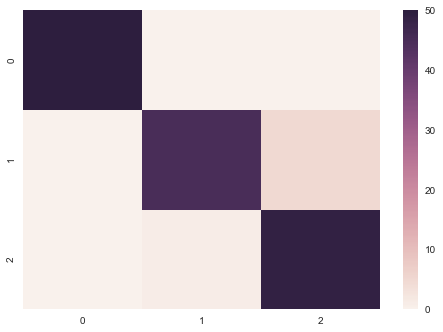

In [16]:
%pylab inline
import seaborn
seaborn.heatmap(m)

## 產生Classfication Report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(predicted , iris.target))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.90      0.98      0.94        46
          2       0.98      0.91      0.94        54

avg / total       0.96      0.96      0.96       150



## 交叉驗證

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
iris.data.shape

(150, 4)

In [24]:
iris.target.shape

(150,)

## Holdout 驗證

In [28]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, test_size = 0.33, random_state = 123)

In [29]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [31]:
predicted = clf.predict(test_X)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted, test_y)

array([[20,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 17]])

## KFold Cross Validation

In [43]:
from sklearn.model_selection import KFold
kf = KFold(n_splits= 10)
for train, test in kf.split(iris.data, iris.target):
    #train_X = iris.data[train]
    #train_y = iris.target[train]
    #test_X  = iris.data[test]
    #test_y  = iris.target[test]
    train_X, train_y, test_X, test_y = iris.data[train], iris.target[train], iris.data[test], iris.target[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    print(accuracy_score(predicted, test_y))

1.0
1.0
1.0
1.0
0.933333333333
0.8
1.0
0.866666666667
0.8
1.0


In [46]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
acc = cross_val_score(clf, X=iris.data, y= iris.target, cv= 10)
print(acc)

print(acc.mean())
print(acc.std())


[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  1.          1.          1.        ]
0.96
0.0442216638714


## 留一驗證

In [47]:
from sklearn.model_selection import LeaveOneOut

res = []
loo = LeaveOneOut()

X = iris.data
y = iris.target
for train, test in loo.split(X, y):
    train_X, test_X, train_y, test_y = X[train],X[test], y[train], y[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    res.extend((predicted == test_y).tolist())
sum(res)

144

## ROC Curve

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)
#clf.predict_proba(iris.data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[50:150,]
iris.target[50:150]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [63]:
from sklearn.model_selection import train_test_split

train_X, train_y, test_X, test_y = train_test_split(X, y, test_size = 0.33, random_state = 123)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [64]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [65]:
probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
probas_[:, 1]

array([ 0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.])

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])

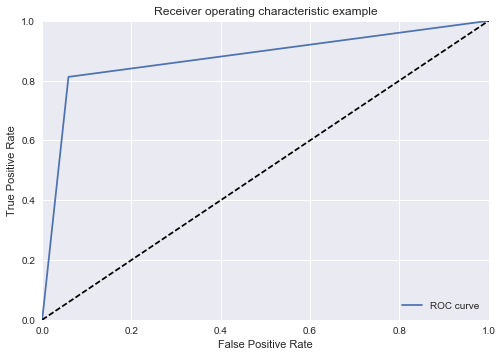

In [69]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## 計算 Area Under Curve (AUC)

In [70]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.876838235294


## 比較不同學習模型

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier(n_estimators=1000)
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

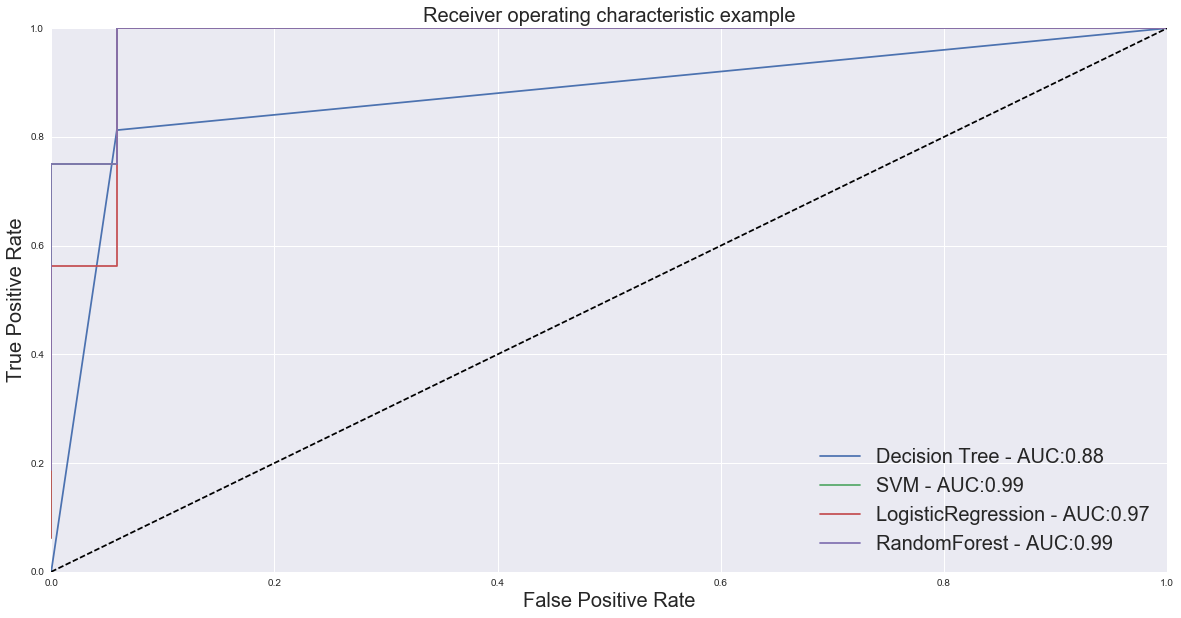

In [76]:
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()


## 客戶流失分析

In [77]:
import pandas
customer = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col = 0)

In [78]:
customer.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### Data Preprocessing

In [79]:
del customer['state']
del customer['account_length']
del customer['area_code']

In [81]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 17 columns):
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls                 3333 non-null int64
total_intl_charge                3333 non-null float64
number_customer_service_calls    3333 non-null int64
churn                      

In [86]:
international_plan = pandas.get_dummies(customer['international_plan'])
del international_plan['no']
international_plan.columns = ['international_plan_y']
international_plan.head()

,international_plan_y
1,0
2,0
3,0
4,1
5,1


In [87]:
voice_mail_plan = pandas.get_dummies(customer['voice_mail_plan'])
del voice_mail_plan['no']
voice_mail_plan.columns = ['voice_mail_plan_y']
voice_mail_plan.head()

,voice_mail_plan_y
1,1
2,1
3,0
4,0
5,0


In [98]:
customer_feature = pandas.concat([customer, international_plan, voice_mail_plan], axis = 1)
del customer_feature['international_plan']
del customer_feature['voice_mail_plan']
del customer_feature['churn']
customer_feature.head()
X= customer_feature

In [99]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(customer['churn'])
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 機器學習分析

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 123)

clf = DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [107]:
predicted = clf.predict(test_X)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, test_y)

0.91363636363636369

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted, test_y)

array([[894,  39],
       [ 56, 111]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True, kernel='linear')
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier(n_estimators=1000)
clf4.fit(train_X, train_y)

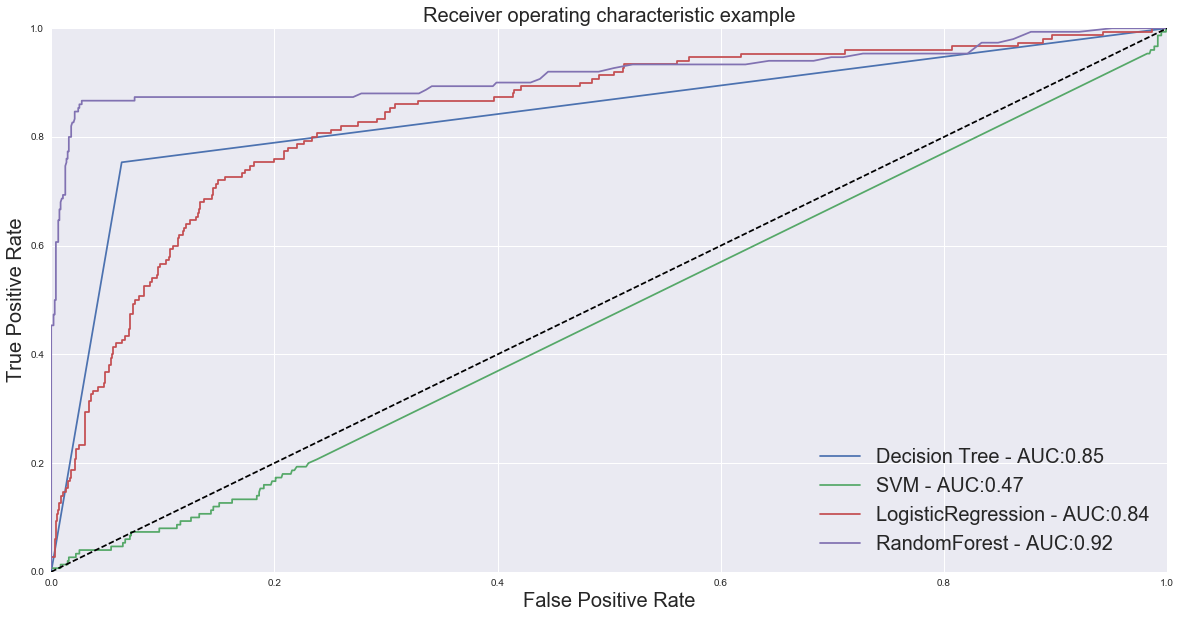

In [111]:
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()
